# Implementation of KMeans Clustering Algorithm From Scratch
# Banknotes Authentication

In [1]:
print(
    'This project is centered on differentiating genuine and forged banknotes using K-Means, an unsupervised machine learning task. Data were collected from images that were taken from genuine and forged banknote-like specimens. For feature extraction, mathematical tools, Wavelets were used. The final images have 400 x 400 pixels.  Wavelet Transform tools were used to transform these features into numeric values (variance and skewness of the images). These two independent features were used to train the machine learning model to automatically detect forged banknotes'
)

This project is centered on differentiating genuine and forged banknotes using K-Means, an unsupervised machine learning task. Data were collected from images that were taken from genuine and forged banknote-like specimens. For feature extraction, mathematical tools, Wavelets were used. The final images have 400 x 400 pixels.  Wavelet Transform tools were used to transform these features into numeric values (variance and skewness of the images). These two independent features were used to train the machine learning model to automatically detect forged banknotes


In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
missing_values = ['NaN', 'Na', 0.00, np.nan]
bank = pd.read_csv('bank_note.csv', na_values = missing_values)
bank = bank.dropna()
bank.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [4]:
# df = bank[['V1', 'V2']]
df = bank.copy()
df.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [5]:
print(df.describe())

                V1           V2
count  1372.000000  1372.000000
mean      0.433735     1.922353
std       2.842763     5.869047
min      -7.042100   -13.773100
25%      -1.773000    -1.708200
50%       0.496180     2.319650
75%       2.821475     6.814625
max       6.824800    12.951600


In [5]:
# class KMeans():
    
#     def __init__(self, data, k):
#         self.data = data
# #         self.centroids = centroids
#         self.k    = k
    
#     def random_centroids(data, k):
#         Centroids = []
#         for e in range(k):
#             centroid = data.apply(lambda x: x.sample())
#             Centroids.append(centroid)
#         return pd.concat(Centroids, axis = 1)
    
#     def assign_labels(data, centroids):
#         Eucl_distance = centroids.apply(lambda x: np.sqrt((data - x)**2).sum(axis = 1))
#         return Eucl_distance.idxmin(axis = 1)
    
#     def update_centroids(data, labels, k):
#         return data.groupby(labels).apply(lambda x: x.mean().T)
    
#     def plot_cluster(data, labels, centroids, iteration):
#         pca = PCA(n_components = 2)
#         cent_2d = pca.fit_transform(centroids.T)
#         clear_output(wait =True)
#         plt.title(f'Iteration{Iteration}\n KMeans Data Clustering', fontweight ='bold')
#         plt.scatter(df.V1, df.V2, c= labels, alpha = 0.8)
#         plt.scatter(cent_2d[:,0], cen_2d[:,1], s = 100)
#         plt.xlabel('Variance (V1)', fontweight ='bold')
#         plt.ylabel('Skewness (V2)', fontweight = 'bold')
        
#         plt.show()

In [6]:
# km = KMeans()
# cent = km.random_centroids(df)
# print(cent)
# # km.assign_labels()
# # km.update_centroids()
# # km.plot_cluster()

In [7]:
# if __name__=='__main__':
#     maximum_iteration = 100
#     k = 2
#     centroids = random_centroids(df, k)
#     old_centroids = pd.DataFrame()
#     while iteration < maximum_iteration and not centroids.equal(old_centroids):
#         old_centroids = centroids 
#         labels = assign_labels(df, k)
#         centroids = update_centroids(df, labels, k)
#         plot_cluster(df, labels, centroids, iteration)
#         iteration += 1
        

# main()

In [6]:
print('Statistical Description:\n', df.describe())

Statistical Description:
                 V1           V2
count  1372.000000  1372.000000
mean      0.433735     1.922353
std       2.842763     5.869047
min      -7.042100   -13.773100
25%      -1.773000    -1.708200
50%       0.496180     2.319650
75%       2.821475     6.814625
max       6.824800    12.951600


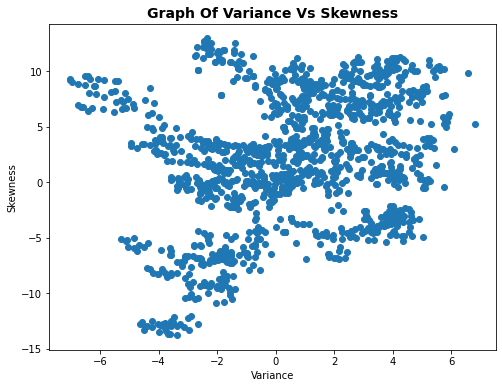

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(df.V1, df.V2)
plt.title('Graph Of Variance Vs Skewness', fontweight= 'bold', fontsize = 14)
plt.xlabel('Variance')
plt.ylabel('Skewness')

plt.show()

# step 1, Data Scaling and Standardization


In [7]:
# df = ((df - df.min())/(df.max() - df.min())) * 9 + 1
# df.head()

In [8]:
# description after normalization
# print('Descriptiion:\n', df.describe())

In [13]:
# Step 2, Randomly Selecting a Centroids
def random_centroids(data, number_centroids):
    Centroids = []
    for e in range(number_centroids):
        cent = data.apply(lambda x: float(x.sample()))
        Centroids.append(cent)
    return pd.concat(Centroids, axis = 1)

In [14]:
my_centroids = random_centroids(df, 2)
my_centroids

,0,1
V1,-0.2780,0.55939
V2,-5.6574,2.29480


In [15]:
# Step 3, Calculate the Eucledean Distance between the centroids and the data point
def get_labels(df, centroids):
    distance = centroids.apply(lambda x: np.sqrt((df - x)**2).sum(axis = 1))
    return distance.idxmin(axis = 1)       

In [16]:
labels_ = get_labels(df, my_centroids)
labels_

0       1
1       1
2       0
3       1
4       0
       ..
1367    1
1368    0
1369    0
1370    0
1371    1
Length: 1372, dtype: int64

In [17]:
# # The Initial Clustering
# Old_centroids = random_centroids(df, 2)
# Old_labels = get_labels(df, Old_centroids)
# Old_labels.value_counts() 

In [18]:
labels_.value_counts()

1    1015
0     357
dtype: int64

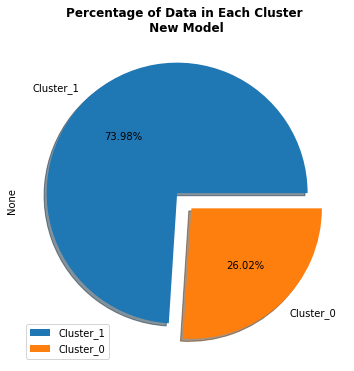

In [19]:
plt.figure(figsize=(8,6))
name = ['Cluster_1', 'Cluster_0']
labels_.value_counts().plot(kind = 'pie', autopct ='%0.2F%%', labels = name, shadow = True, explode =(0.08,0.08))
plt.title('Percentage of Data in Each Cluster\n New Model', fontweight ='bold')

plt.legend()
plt.show()

In [20]:
#  Step 4, Updating the centroids
def update_centroids(df, label, k):
    return df.groupby(label).apply(lambda x: x.mean()).T  # calculating the arithmetic mean

In [21]:
# centro = update_centroids(df, Old_labels, 2)
# centro

In [22]:
#Step 5a, Ploting the Iteration 
def plot_cluster(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    cent_2d = pca.fit_transform(centroids)
    clear_output(wait = True)
    plt.title(f'Iteration{iteration}\n KMeans Data Clustering', fontweight = 'bold')
#     plt.figure(figsize=(10,8))
    plt.scatter(df.V1, df.V2, c = labels, alpha = 0.5)
    plt.scatter(x=cent_2d[:,0], y=cent_2d[:,1], s =100, marker = '+')
    plt.xlabel('Variance (V1)', fontweight ='bold')
    plt.ylabel('Skewness (V2)', fontweight ='bold')

    plt.show()
    

In [34]:
# 3D Plotting Codes

# def plot_cluster(df, labels, centroids, iteration):
#     pca = PCA(n_components = 3)
#     df_3d = pca.fit_transform(df)
#     centroids_3d = pca.transform(centroids.T)
#     clear_output(wait = True)
# #     plt.title(f'Iteration{iteration}\n EPL Player Clustering', fontweight = 'bold')
#     fig = plt.figure(figsize=(20,10))
#     ax = fig.add_subplot(111, projection='3d')
# #     ax.title(f'Iteration{iteration}\n EPL Player Clustering', fontweight = 'bold')
#     ax.scatter(df_3d[:,0], df_3d[:,1], df_3d[:,2], c = labels)
#     ax.scatter(centroids_3d[:,0], centroids_3d[:,1], centroids_3d[:,2], s = 300)
#     ax.view_init(35, 185)
#     plt.show()
    

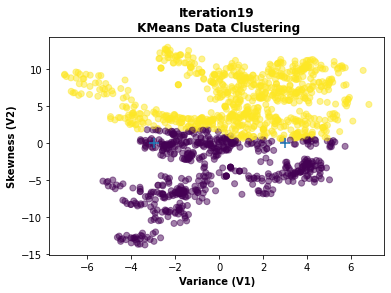

In [32]:
# step 5b, body of the K-Means
maximum_iteration = 20
k=2
centroids = random_centroids(df, k)
old_centroids = pd.DataFrame()
iteration = 1
while iteration < maximum_iteration and not centroids.equals(old_centroids):
    old_cetroids = centroids
    labels = get_labels(df, centroids)
    centroids = update_centroids(df, labels, k)
    plot_cluster(df, labels, centroids, iteration)
    iteration += 1

In [33]:
labels.value_counts()

1    793
0    579
dtype: int64

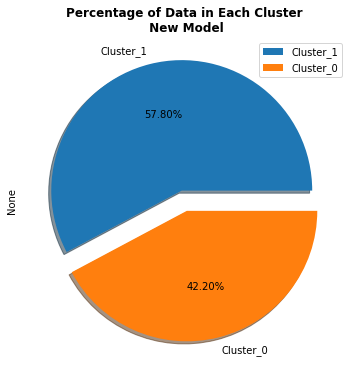

In [34]:
plt.figure(figsize=(8,6))
name = ['Cluster_1', 'Cluster_0']
labels.value_counts().plot(kind = 'pie', autopct ='%0.2F%%', labels = name, shadow = True, explode =(0.08,0.08))
plt.title('Percentage of Data in Each Cluster\n New Model', fontweight ='bold')

plt.legend()
plt.show()

In [26]:
bank['labels'] = pd.Series(labels)
bank.head()

,V1,V2,labels
0,3.62160,8.6661,0
1,4.54590,8.1674,0
2,3.86600,-2.6383,1
3,3.45660,9.5228,0
4,0.32924,-4.4552,1


In [27]:
bank.groupby('labels').describe()

V1                                                                 \
        count      mean       std     min      25%      50%      75%     max   
labels                                                                         
0       793.0  0.983058  2.878864 -7.0421 -0.77995  1.22620  3.27040  6.8248   
1       579.0 -0.318619  2.613662 -5.2943 -2.28075 -0.90784  1.73685  5.7403   

           V2                                                                   
        count      mean       std       min      25%     50%      75%      max  
labels                                                                          
0       793.0  5.960104  3.190370   0.57732  3.16600  6.0630  8.73240  12.9516  
1       579.0 -3.607761  3.841143 -13.77310 -6.36825 -3.2467 -0.15521   1.8127